In [17]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [18]:
dirn = './forecastData/'
filen = 'ayeyarwady_division,myanmar.nc'

dat = xr.open_dataset(dirn+filen)
dat

<xarray.Dataset>
Dimensions:                (forecast_time0: 11, initial_time0_hours: 30, lat_0: 9, lon_0: 9)
Coordinates:
  * lon_0                  (lon_0) float32 93.2 93.7 94.2 94.7 95.2 95.7 ...
  * forecast_time0         (forecast_time0) timedelta64[ns] 0 days 1 days ...
  * initial_time0_hours    (initial_time0_hours) datetime64[ns] 2008-04-01 ...
  * lat_0                  (lat_0) float32 19.5 19.0 18.5 18.0 17.5 17.0 ...
Data variables:
    initial_time0          (initial_time0_hours) |S18 ...
    initial_time0_encoded  (initial_time0_hours) float64 ...
    tp_P11_L1_GLL0_acc     (initial_time0_hours, forecast_time0, lat_0, lon_0) float64 ...

In [19]:
#  the rain variable is, unfortunately, named different things in different files, so you'll
#   need to look at the variable names above and choose the right one (usually starts with 
#    "tp..."):

rain = dat['tp_P11_L1_GLL0_acc']

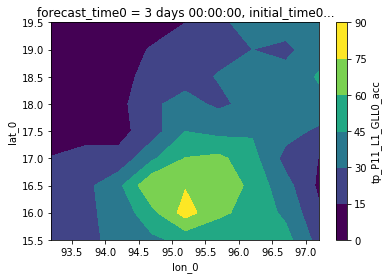

In [21]:
# here we select the 3-day forecast made on April 23, 2008, and plot a map of this rainfall
#  (to be clear, this is the rain predicted to fall on April 26, according to the forecast
#   issued on April 23).  Not bothering with coastlines here, but you can add those:

rain.sel(initial_time0_hours='2008-04-23T00:00:00.000000000',forecast_time0='3 days').plot.contourf()


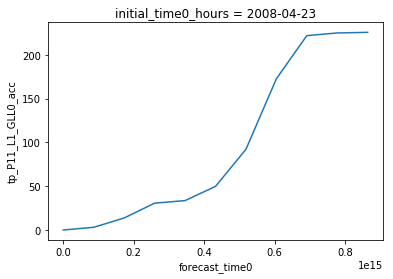

In [22]:
#  now let's average spatially and plot a *time series* of the predicted rain:

rain.sel(initial_time0_hours='2008-04-23T00:00:00.000000000').mean(dim={'lon_0','lat_0'}).plot()